In [1]:
import re
import numpy as np
import math
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline
import sklearn.datasets
from sklearn import preprocessing, model_selection

/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Data loading

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X=mnist.train.images
X_val=mnist.test.images
#X = np.vstack((X_train, X_test))

y=mnist.train.labels
y_val=mnist.test.labels
#y = np.vstack((y_train, y_test))

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.999, random_state=42, stratify=y)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
y_train.shape

(55, 10)

In [4]:
X_test.shape

(54945, 784)

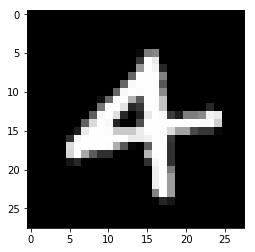

In [5]:
plt.imshow(X_train[4].reshape(28, 28), plt.cm.gray)

In [6]:
_, train_counts = np.unique(np.argmax(y_train,1), return_counts=True)
train_max = np.argmax(train_counts)
print(train_counts)
print(train_max)

[5 6 6 6 5 5 5 6 5 6]
1


In [7]:
baseline_acc = np.mean(np.argmax(y_test,1) == train_max)
baseline_acc

0.11234871234871235

# Optimal Encoding

In [8]:
from noisy_networks import NMLP
from networks import MLP
from OptimalEncoding import OptimalEncoding

## Classification

In [9]:
n_in = X_train.shape[-1]
k = 500
n_out = y_train.shape[-1]

sigma=0
weight_sigma=.1

widths = [500,500,500,500,500,500,500,500,500,500,500,500,500]
decode_widths=[10]

In [10]:
X_train.shape

(55, 784)

In [11]:
encoder = NMLP(n_in, k, widths,weight_sigma)
decoder = MLP(k, n_out, decode_widths)

In [12]:
oe = OptimalEncoding(encoder, decoder, k)

100%|██████████| 100000/100000 [2:38:11<00:00, 11.85it/s] 


Sigma: 0.000000
Final task loss: -0.588052


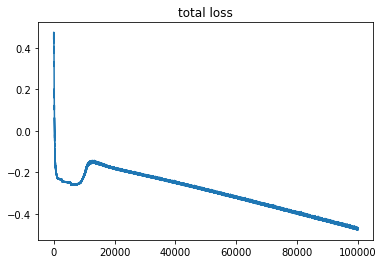

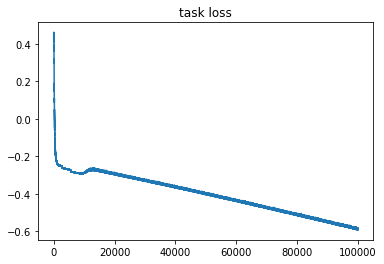

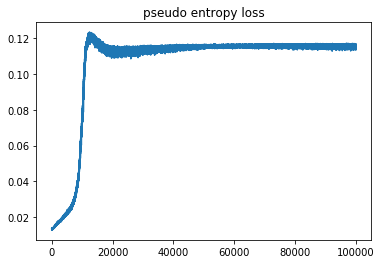

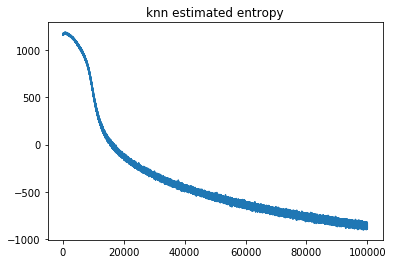

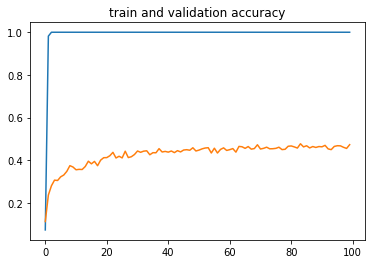

In [13]:
oe.train(X_train, X_val,y_val, y=y_train, 
         min_entropy=True, sigma = sigma, task = 'classification', 
         heteroskedastic = True, n_samples = 10,
         epochs=100000, batch_size=55, lr=1e-6)

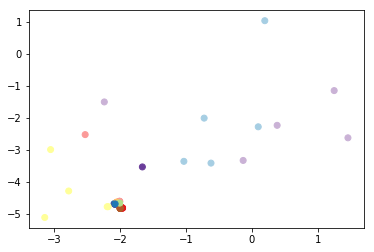

In [14]:
zhat_train = oe.encode(X_train, sigma=sigma)
plt.scatter(zhat_train[:,0], zhat_train[:,1], c = np.argmax(y_train,1), cmap=plt.get_cmap('Paired'))

In [15]:
pred_train = oe.decode(zhat_train)
pred_train = np.argmax(pred_train,1)

true_train = np.argmax(y_train,1)

acc_train = np.mean(pred_train == true_train)
print('train acc = %.3f' %acc_train)

train acc = 1.000


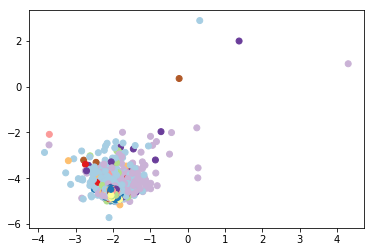

In [16]:
zhat_test = oe.encode(X_test, sigma=sigma)
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = np.argmax(y_test,1), cmap=plt.get_cmap('Paired'))

In [17]:
pred_test = oe.decode(zhat_test)
pred_test = np.argmax(pred_test,1)

true_test = np.argmax(y_test,1)

acc_test = np.mean(pred_test == true_test)
print('test acc = %.3f' %acc_test)

test acc = 0.460


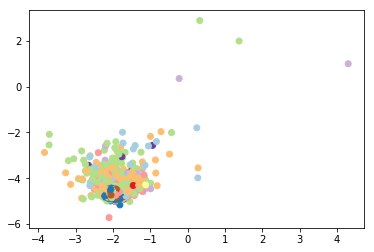

In [18]:
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = pred_test, cmap=plt.get_cmap('Paired'))

In [19]:
1/float(y.shape[-1])

0.1

# SubOptimal Encoding

In [20]:
n_in = X_train.shape[-1]
k = 500
n_out = y_train.shape[-1]

sigma=0
weight_sigma=.1

widths = [500,500,500,500,500,500,500,500,500,500,500,500,500]
decode_widths=[10]

In [21]:
encoder = NMLP(n_in, k, widths, weight_sigma)
decoder = MLP(k, n_out, decode_widths)

In [22]:
oe = OptimalEncoding(encoder, decoder, k)

100%|██████████| 100000/100000 [1:24:28<00:00, 19.73it/s] 


Sigma: 0.000000
Final task loss: -1.537818


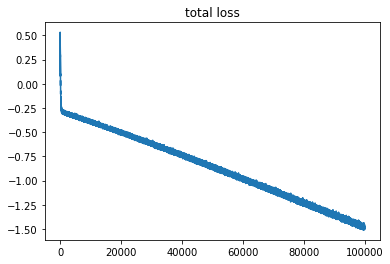

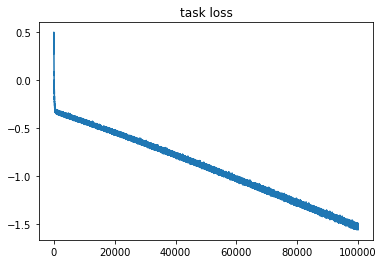

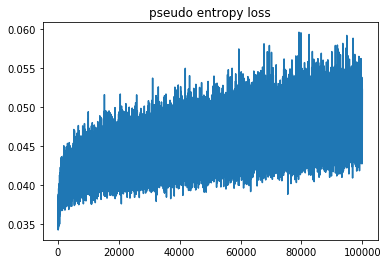

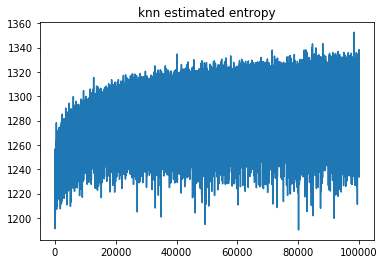

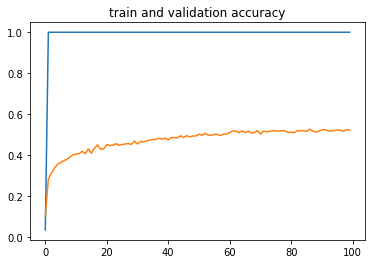

In [23]:
oe.train(X_train, X_val,y_val, y=y_train, 
         min_entropy=False, sigma = sigma, task = 'classification', 
         heteroskedastic = True, n_samples = 10,
         epochs=100000, batch_size=13, lr=1e-6)

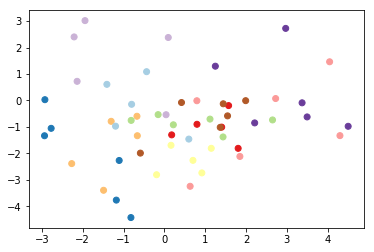

In [24]:
zhat_train = oe.encode(X_train, sigma=sigma)
plt.scatter(zhat_train[:,0], zhat_train[:,1], c = np.argmax(y_train,1), cmap=plt.get_cmap('Paired'))

In [25]:
pred_train = oe.decode(zhat_train)
pred_train = np.argmax(pred_train,1)

true_train = np.argmax(y_train,1)

acc_train = np.mean(pred_train == true_train)
print('train acc = %.3f' %acc_train)

train acc = 1.000


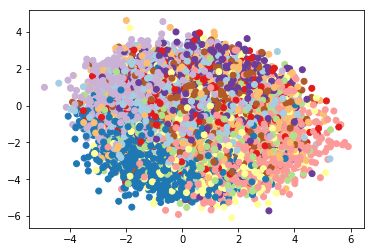

In [26]:
zhat_test = oe.encode(X_test, sigma=sigma)
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = np.argmax(y_test,1), cmap=plt.get_cmap('Paired'))

In [27]:
pred_test = oe.decode(zhat_test)
pred_test = np.argmax(pred_test,1)

true_test = np.argmax(y_test,1)

acc_test = np.mean(pred_test == true_test)
print('test acc = %.3f' %acc_test)

test acc = 0.518


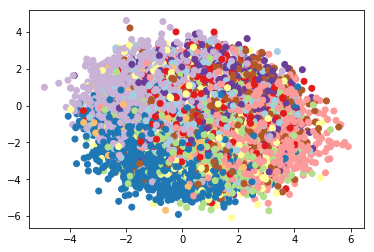

In [28]:
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = pred_test, cmap=plt.get_cmap('Paired'))

In [29]:
1/float(y.shape[-1])

0.1